In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, plotly.express as px
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
df = pd.read_csv("../dataset/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.shape

(10000, 14)

In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"]) # Gender: Female = 0, Male = 1;

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [12]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [16]:
oneh = OneHotEncoder(drop='first')
geo_en = oneh.fit_transform(df[['Geography']]).toarray()
geo_en_df = pd.DataFrame(geo_en, columns=oneh.get_feature_names_out(['Geography']))
geo_en_df

,Geography_Germany,Geography_Spain
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
9995,0.0,0.0
9996,0.0,0.0
9997,0.0,0.0
9998,1.0,0.0


In [17]:
df = pd.concat([df.drop(columns=["Geography"]),geo_en_df], axis=1)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,0.0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,0.0,0.0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0


In [18]:
df.shape

(10000, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Gender             10000 non-null  int64  
 5   Age                10000 non-null  int64  
 6   Tenure             10000 non-null  int64  
 7   Balance            10000 non-null  float64
 8   NumOfProducts      10000 non-null  int64  
 9   HasCrCard          10000 non-null  int64  
 10  IsActiveMember     10000 non-null  int64  
 11  EstimatedSalary    10000 non-null  float64
 12  Exited             10000 non-null  int64  
 13  Geography_Germany  10000 non-null  float64
 14  Geography_Spain    10000 non-null  float64
dtypes: float64(4), int64(10), object(1)
memory usage: 1.1+ MB


# Necessary EDA

([<matplotlib.patches.Wedge at 0x19c2d2f2490>,
 [Text(-0.1276893163965617, -1.0925636999636126, '0'),
  Text(0.12769000234403532, 1.0925636197958362, '1')],
 [Text(-0.06964871803448819, -0.5959438363437886, '79.6%'),
  Text(0.06964909218765562, 0.5959437926159106, '20.4%')])

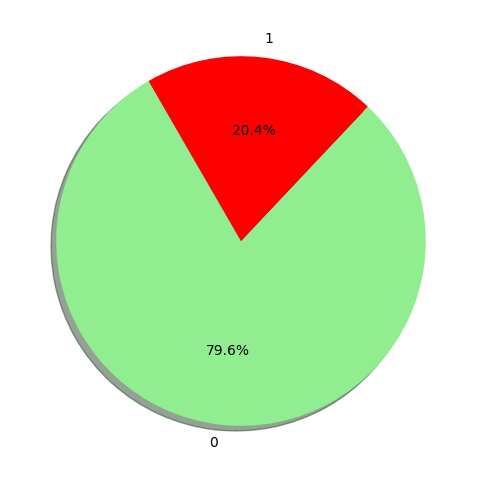

In [19]:
# This visualization was created to see the churn rate of customers.
exited_counts = df['Exited'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(exited_counts,
       labels = exited_counts.index,
       autopct = '%1.1f%%',
       startangle=120,
        colors = ['lightgreen', 'red'],
        shadow = True
)

In [ ]:
df.corr(numeric_only = True)

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
RowNumber,1.000000,0.004202,0.005840,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571,-0.000044,-0.009905
CustomerId,0.004202,1.000000,0.005308,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.003097,0.007800
CreditScore,0.005840,0.005308,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780
Gender,0.018196,-0.002641,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,-0.024628,0.016889
Age,0.000783,0.009497,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685
Tenure,-0.006495,-0.014883,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868
Balance,-0.009067,-0.012419,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892
NumOfProducts,0.007246,0.016972,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039
HasCrCard,0.000599,-0.014025,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480
IsActiveMember,0.012044,0.001665,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732


In [21]:
df.describe()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700
std,2886.89568,7.193619e+04,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698
min,1.00000,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000
max,10000.00000,1.581569e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


In [22]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,0.0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,0.0,0.0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0


# Splitting Features and Target 

In [23]:
x = df.drop(columns=['Exited','RowNumber','Surname'], axis=1)
y = df[['Exited']]

In [24]:
x.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,0.0,0.0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0.0,1.0
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,0.0,0.0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0.0,0.0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0.0,1.0


In [25]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


# split dataset into 70% test & 30% test

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [27]:
x_train.shape

(7000, 12)

In [28]:
y_train.shape

(7000, 1)

# Decision Tree model Training


In [29]:
dtc = DecisionTreeClassifier()

In [30]:
model= dtc.fit(x_train, y_train)
model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
y_pred = model.predict(x_test)

In [32]:
accuracy_score(y_test, y_pred)

0.794

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2416
           1       0.48      0.53      0.50       584

    accuracy                           0.80      3000
   macro avg       0.68      0.69      0.69      3000
weighted avg       0.80      0.80      0.80      3000



In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2082,  334],
       [ 284,  300]])

# Visualize Confusion Matrix

In [34]:
cm_df = pd.DataFrame(cm, index=["Actual Negative", "Actual Positive"],
                    columns = ["Predicted Negative", "Predicted Positve"])
cm_df

,Predicted Negative,Predicted Positve
Actual Negative,2082,334
Actual Positive,284,300


In [40]:
fig = px.imshow(cm_df,
               text_auto=True,
               color_continuous_scale='Viridis',
               title= "Confusion Matrix")
fig.update_layout(
    title={
        'text':'Confusion Matrix',
        'x':0.5,
        'xanchor':'center'
    },
    xaxis_title="Predicted Label",
    yaxis_title="True Label",
    coloraxis_showscale=True
)
fig.show()

# Save Model

In [36]:
save_objects = {
    "Churn_model":model,
    "Onehot_enc":oneh,
    "Label_enc":le
}

In [39]:
with open("../model/Churn_model.pkl","wb") as f:
    pickle.dump(save_objects, f)
print("Model & encoding save successfully!😍😍")

Model & encoding save successfully!😍😍
